In [2]:
from tensorflow.keras.utils import to_categorical

In [6]:
!pip install np_utils

     |████████████████████████████████| 61 kB 2.6 MB/s 
  Created wheel for np-utils: filename=np_utils-0.5.12.1-py3-none-any.whl size=57131 sha256=a697762390c927ac13b744fc8942b906335faa93fa6850540bfa97b90fa187f8
  Stored in directory: /root/.cache/pip/wheels/8c/4e/ef/095c24693723c329f4cdc1079861cdbb2487d4b41b2496a4e7
Successfully built np-utils


In [7]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import np_utils
from keras import optimizers
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.layers import (
    BatchNormalization) 
from keras.regularizers import l2
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, scale
from keras.utils import np_utils
import keras

In [8]:
from tensorflow.keras import layers

In [9]:
#MODELS

In [10]:
#MUltilayer perceptron model with linear activation function
def NN1(input_dim, output_dim, isClassification = True):
    print("Starting NN1")
    
    model = Sequential()
    model.add(Dense(50, input_dim=input_dim, activation='linear', kernel_initializer='normal', kernel_regularizer=l2(0.01)))
    model.add(Dense(100, activation='linear', kernel_initializer='normal', kernel_regularizer=l2(0.01)))
    model.add(Dense(50, activation='linear', kernel_initializer='normal', kernel_regularizer=l2(0.01)))

    if (isClassification == False):
        model.add(Dense(1, kernel_initializer='normal'))
        model.compile(loss='mean_squared_error', optimizer='sgd')
    elif (isClassification == True):
        model.add(Dense(output_dim, activation='softmax', kernel_initializer='normal'))
        model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
        
    return model

In [11]:
#MUltilayer perceptron model with non-linear activation function
def NN2(input_dim, output_dim, isClassification = True):
    print("Starting NN2")
    
    model = Sequential()
    model.add(Dense(50, input_dim=input_dim, activation='relu', kernel_initializer='normal', kernel_regularizer=l2(0.01)))
    model.add(Dense(100, activation='relu', kernel_initializer='normal', kernel_regularizer=l2(0.01)))
    model.add(Dense(50, activation='relu', kernel_initializer='normal', kernel_regularizer=l2(0.01)))
        
    if (isClassification == False):
        model.add(Dense(1, kernel_initializer='normal'))
        model.compile(loss='mean_squared_error', optimizer='sgd')
    elif (isClassification == True):
        model.add(Dense(output_dim, activation='softmax', kernel_initializer='normal'))
        model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
        
    return model

In [12]:
#MUltilayer perceptron model with non-linear activation function (sigmoid)
def NN3(input_dim, output_dim, isClassification = True):
    print("Starting NN3")
    
    model = Sequential()
    model.add(Dense(50, input_dim=input_dim, activation='sigmoid', kernel_initializer='normal', kernel_regularizer=l2(0.01)))
    model.add(Dense(100, activation='sigmoid', kernel_initializer='normal', kernel_regularizer=l2(0.01)))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='normal', kernel_regularizer=l2(0.01)))
        
    if (isClassification == False):
        model.add(Dense(1, kernel_initializer='normal'))
        model.compile(loss='mean_squared_error', optimizer='sgd')
    elif (isClassification == True):
        model.add(Dense(output_dim, activation='softmax', kernel_initializer='normal'))
        model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])
        
    return model

In [13]:
#Single layer model with non-linear activation function
def NN4(input_dim, output_dim, isClassification = True):
    print("Starting NN4")
    
    model = Sequential()
    model.add(Dense(50, input_dim=input_dim, activation='relu'))
    

    if (isClassification == False):
        model.add(Dense(1, kernel_initializer='normal'))
        model.compile(loss='mean_squared_error', optimizer='sgd')
    elif (isClassification == True):
        model.add(Dense(output_dim, activation='softmax', kernel_initializer='normal'))
        model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])
        
    return model



In [14]:
#Single layer model with linear activation function
def NN5(input_dim, output_dim, isClassification = True):
    print("Starting NN5")
    
    model = Sequential()
    model.add(Dense(50, input_dim=input_dim, activation='linear'))

    if (isClassification == False):
        model.add(Dense(1, kernel_initializer='normal'))
        model.compile(loss='mean_squared_error', optimizer='sgd')
    elif (isClassification == True):
        model.add(Dense(output_dim, activation='softmax', kernel_initializer='normal'))
        model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])
        
    return model

In [43]:
#RNN
from keras.layers import SimpleRNN, LSTM , Embedding

def NN6(input_dim, output_dim, isClassification = True):
    print("Starting NN6")
    
    model = Sequential()
    model.add(Embedding(100,50,input_dim=input_dim))
    model.add(LSTM(50))
    model.add(Dense(100, activation="relu"))
    model.add(Dense(50, activation="sigmoid"))

    if (isClassification == False):
        model.add(Dense(1, kernel_initializer='normal'))
        model.compile(loss='mean_squared_error', optimizer='sgd')
    elif (isClassification == True):
        model.add(Dense(output_dim, activation='softmax', kernel_initializer='normal'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    return model



In [16]:
# Deep Model
def DeepNN(input_dim, output_dim, isClassification = True):
    print("Starting DeepNN")
    
    model = Sequential()
    model.add(Dense(500, input_dim=input_dim, activation='relu', kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1024, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2048, kernel_initializer='normal', kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(4096, kernel_initializer='random_uniform', kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(2048, kernel_initializer='random_uniform', kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1024, kernel_initializer='normal', kernel_regularizer=l2(0.1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(500, kernel_initializer='normal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(PReLU())

    if (isClassification == False):
        model.add(Dense(1, kernel_initializer='normal'))
        model.compile(loss='mean_squared_error', optimizer='adam')
    elif (isClassification == True):
        model.add(Dense(output_dim, activation='softmax', kernel_initializer='normal'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    return model

In [17]:
#VARIANCE IMPORTANCE METHODS

In [18]:
# VIANN
# Variance-based Feature Importance of Artificial Neural Networks
class VarImpVIANN(keras.callbacks.Callback):
    def __init__(self, verbose=0):
        self.verbose = verbose
        self.n = 0
        self.M2 = 0.0

    def on_train_begin(self, logs={}, verbose = 1):
        if self.verbose:
            print("VIANN version 1.0 (Wellford + Mean) update per epoch")
        self.diff = self.model.layers[0].get_weights()[0]
        
    def on_epoch_end(self, batch, logs={}):
        currentWeights = self.model.layers[0].get_weights()[0]
        
        self.n += 1
        delta = np.subtract(currentWeights, self.diff)
        self.diff += delta/self.n
        delta2 = np.subtract(currentWeights, self.diff)
        self.M2 += delta*delta2
            
        self.lastweights = self.model.layers[0].get_weights()[0]

    def on_train_end(self, batch, logs={}):
        if self.n < 2:
            self.s2 = float('nan')
        else:
            self.s2 = self.M2 / (self.n - 1)
        
        scores = np.sum(np.multiply(self.s2, np.abs(self.lastweights)), axis = 1)
        
        self.varScores = (scores - min(scores)) / (max(scores) - min(scores))
        if self.verbose:
            print("Most important variables: ",
                  np.array(self.varScores).argsort()[-10:][::-1])

In [19]:
# Taken from https://csiu.github.io/blog/update/2017/03/29/day33.html
def garson(A, B):
    """
    Computes Garson's algorithm
    A = matrix of weights of input-hidden layer (rows=input & cols=hidden)
    B = vector of weights of hidden-output layer
    """
    B = np.diag(B)

    # connection weight through the different hidden node
    cw = np.dot(A, B)

    # weight through node (axis=0 is column; sum per input feature)
    cw_h = abs(cw).sum(axis=0)

    # relative contribution of input neuron to outgoing signal of each hidden neuron
    # sum to find relative contribution of input neuron
    rc = np.divide(abs(cw), abs(cw_h))
    rc = rc.sum(axis=1)

    # normalize to 100% for relative importance
    ri = rc / rc.sum()
    return(ri)


In [20]:
# Adapted from https://csiu.github.io/blog/update/2017/03/29/day33.html
class VarImpGarson(keras.callbacks.Callback):
    def __init__(self, verbose=0):
        self.verbose = verbose
        
    def on_train_end(self, batch, logs={}):
        if self.verbose:
            print("VarImp Garson")
        """
        Computes Garson's algorithm
        A = matrix of weights of input-hidden layer (rows=input & cols=hidden)
        B = vector of weights of hidden-output layer
        """
        A = self.model.layers[0].get_weights()[0]
        B = self.model.layers[len(self.model.layers)-1].get_weights()[0]
        
        self.varScores = 0
        for i in range(B.shape[1]):
            self.varScores += garson(A, np.transpose(B)[i])
        if self.verbose:
            print("Most important variables: ",
                np.array(self.varScores).argsort()[-10:][::-1])

In [21]:
# Leave-One-Feature-Out LOFO
def LeaveOneFeatureOut(model, X, Y):
    OneOutScore = []
    n = X.shape[0]
    for i in range(0,X.shape[1]):
        newX = X.copy()
        newX[:,i] = 0 #np.random.normal(0,1,n)
        OneOutScore.append(model.evaluate(newX, Y, batch_size=2048, verbose=0))
    OneOutScore = pd.DataFrame(OneOutScore[:])
    ordered = np.argsort(-OneOutScore.iloc[:,0])
    return(OneOutScore, ordered)

In [22]:
#TESTING VARIABLE IMPORTANCE

In [23]:
#Settings obtained for each dataset

In [31]:
data = list()
data.append({"name": 'breastcancer', "classification": True, "data": datasets.load_breast_cancer()})
data.append({"name": 'digits', "classification": True, "data": datasets.load_digits()})
data.append({"name": 'iris', "classification": True, "data": datasets.load_iris()})
data.append({"name": 'wine', "classification": True, "data": datasets.load_wine()})
data.append({"name": 'boston', "classification": False, "data": datasets.load_boston()})
data.append({"name": 'diabetes', "classification": False, "data": datasets.load_diabetes()})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [33]:
from keras.callbacks import Callback
import numpy as np

class AccuracyMonitor(tensorflow.keras.callbacks.Callback):
    def __init__(self,
                 monitor=['val_acc'],
                 verbose=0,
                 min_epochs=5,
                 baseline=None):
        super(AccuracyMonitor, self).__init__()

        self.monitor = monitor
        self.baseline = baseline
        self.verbose = verbose
        self.min_epochs = min_epochs
        self.stopped_epoch = 0

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

        #if logs.get(self.monitor) > self.baseline and epoch > self.min_epochs:
            #self.stopped_epoch = epoch
            #self.model.stop_training = True
            #print('\n Stopped at epoch {epoch}. Accuracy of {accuracy} reached.'.format(epoch=(self.stopped_epoch + 1), accuracy=logs.get(self.monitor)), "\n")

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0 and self.verbose > 0:
            print('Epoch %05d: early stopping' % (self.stopped_epoch + 1))

In [44]:
import matplotlib.pyplot as plt
from numpy.random import seed
from keras.callbacks import EarlyStopping

def runExp(data, mdl = "NN1", xseed = 42, epochs = 1000, verbose = 0):

    res = list()
    VIANN_list = []
    Garson_list = []
    LOFO_list = []
    RF_list = []
    for i in range(len(data)):
        seed(xseed)
        
        dataset = data[i]['data']
        isClassification = data[i]['classification']
        datname = data[i]['name']
        
        print("============")
        print( data[i]['name'])
        print("============\n")

        if isClassification == True:
            #Classification

            labels_encoded = []
            for labels in [dataset.target]:
                encoder = LabelEncoder()
                encoder.fit(labels)
                encoded_Y = encoder.transform(labels)
                # convert integers to dummy variables (i.e. one hot encoded)
                labels_encoded.append(np_utils.to_categorical(encoded_Y))
            dataset.targetLabels = labels_encoded[0]

            # fit a Random Forest model to the data
            RFmodel = RandomForestClassifier(n_estimators=100)

            output_size = dataset.targetLabels.shape[1]

        else:
            dataset.targetLabels = scale(dataset.target)
            output_size = 1

            # fit a Random Forest model to the data
            RFmodel = RandomForestRegressor(n_estimators=100)

        X = scale(dataset.data)
        Y = dataset.targetLabels

        RFmodel.fit(X, Y)
        
        VIANN = VarImpVIANN(verbose=verbose)
        Garson = VarImpGarson(verbose=verbose)

        if (mdl == "NN1"):
            model = NN1(X.shape[1], output_size, isClassification)
        elif (mdl == "NN2"):
            model = NN2(X.shape[1], output_size, isClassification)
        elif (mdl == "NN3"):
            model = NN3(X.shape[1], output_size, isClassification)
        elif (mdl == "NN4"):
            model = NN4(X.shape[1], output_size, isClassification)
        elif (mdl == "NN5"):
            model = NN5(X.shape[1], output_size, isClassification)
        elif (mdl == "DeepNN"):
            model = DeepNN(X.shape[1], output_size, isClassification)
        
        clbs = [VIANN,Garson]
        if isClassification == True:
            clbs.append(AccuracyMonitor(monitor='val_acc', baseline=0.95, min_epochs = 5))
        else:
            epochs = 100
        
        model.fit(X, Y, validation_split=0.05, epochs=epochs, batch_size=np.round(X.shape[0]/7).astype(int), shuffle=True, 
                  verbose=verbose, callbacks = clbs)

        LOFO, LOFO_Ordered = LeaveOneFeatureOut(model, X, Y)

        print('VIANN vs LOFO:  ', round(np.corrcoef([VIANN.varScores,LOFO[0]])[0,1], 2))
        print('VIANN vs RF:    ', round(np.corrcoef([VIANN.varScores,RFmodel.feature_importances_])[0,1], 2))
        print('Garson vs LOFO: ', round(np.corrcoef([Garson.varScores,LOFO[0]])[0,1], 2))
        print('Garson vs VIANN:', round(np.corrcoef([Garson.varScores,VIANN.varScores])[0,1], 2))
        
        res.append([data[i]['name'],
                    round(np.corrcoef([VIANN.varScores,LOFO[0]])[0,1], 2), 
                    round(np.corrcoef([VIANN.varScores,RFmodel.feature_importances_])[0,1], 2),
                    round(np.corrcoef([Garson.varScores,LOFO[0]])[0,1], 2),
                    round(np.corrcoef([Garson.varScores,VIANN.varScores])[0,1], 2)
                          ])
        
        VIANN_list.append([data[i]['name'], VIANN.varScores])
        Garson_list.append([data[i]['name'], Garson.varScores])
        LOFO_list.append([data[i]['name'], LOFO])
        RF_list.append([data[i]['name'], RFmodel.feature_importances_])
        
    df = pd.DataFrame(res)
    df.columns = ("Dataset", "VIANN vs LOFO", "VIANN vs RF", "Garson vs LOFO", "Garson vs VIANN")
    
    return df, VIANN_list, Garson_list, LOFO_list, RF_list

In [36]:
rsNN1, VIANN_NN1, Garson_NN1, LOFO_NN1, RF = runExp(data, mdl = "NN1", verbose = 0)
rsNN1

breastcancer

Starting NN1
VIANN vs LOFO:   0.74
VIANN vs RF:     0.22
Garson vs LOFO:  0.77
Garson vs VIANN: 0.76
digits

Starting NN1
VIANN vs LOFO:   0.92
VIANN vs RF:     0.7
Garson vs LOFO:  0.89
Garson vs VIANN: 0.88
iris

Starting NN1
VIANN vs LOFO:   1.0
VIANN vs RF:     0.99
Garson vs LOFO:  0.96
Garson vs VIANN: 0.95
wine

Starting NN1
VIANN vs LOFO:   0.81
VIANN vs RF:     0.78
Garson vs LOFO:  0.82
Garson vs VIANN: 0.96
boston

Starting NN1
VIANN vs LOFO:   0.9
VIANN vs RF:     0.73
Garson vs LOFO:  0.92
Garson vs VIANN: 0.85
diabetes

Starting NN1
VIANN vs LOFO:   0.93
VIANN vs RF:     0.81
Garson vs LOFO:  0.89
Garson vs VIANN: 0.8


,Dataset,VIANN vs LOFO,VIANN vs RF,Garson vs LOFO,Garson vs VIANN
0,breastcancer,0.74,0.22,0.77,0.76
1,digits,0.92,0.70,0.89,0.88
2,iris,1.00,0.99,0.96,0.95
3,wine,0.81,0.78,0.82,0.96
4,boston,0.90,0.73,0.92,0.85
5,diabetes,0.93,0.81,0.89,0.80


In [37]:
rsNN2, VIANN_NN2, Garson_NN2, LOFO_NN2, RF = runExp(data, mdl = "NN2", verbose = 0)
rsNN2

breastcancer

Starting NN2
VIANN vs LOFO:   0.8
VIANN vs RF:     0.15
Garson vs LOFO:  0.72
Garson vs VIANN: 0.69
digits

Starting NN2
VIANN vs LOFO:   0.9
VIANN vs RF:     0.8
Garson vs LOFO:  0.91
Garson vs VIANN: 0.87
iris

Starting NN2
VIANN vs LOFO:   1.0
VIANN vs RF:     0.95
Garson vs LOFO:  0.96
Garson vs VIANN: 0.94
wine

Starting NN2
VIANN vs LOFO:   0.7
VIANN vs RF:     0.84
Garson vs LOFO:  0.79
Garson vs VIANN: 0.92
boston

Starting NN2
VIANN vs LOFO:   0.98
VIANN vs RF:     0.82
Garson vs LOFO:  0.87
Garson vs VIANN: 0.77
diabetes

Starting NN2
VIANN vs LOFO:   0.99
VIANN vs RF:     0.83
Garson vs LOFO:  0.84
Garson vs VIANN: 0.87


,Dataset,VIANN vs LOFO,VIANN vs RF,Garson vs LOFO,Garson vs VIANN
0,breastcancer,0.80,0.15,0.72,0.69
1,digits,0.90,0.80,0.91,0.87
2,iris,1.00,0.95,0.96,0.94
3,wine,0.70,0.84,0.79,0.92
4,boston,0.98,0.82,0.87,0.77
5,diabetes,0.99,0.83,0.84,0.87


In [38]:
rsNN3, VIANN_NN3, Garson_NN3, LOFO_NN3, RF = runExp(data, mdl = "NN3", verbose = 0)
rsNN3

breastcancer

Starting NN3
VIANN vs LOFO:   0.15
VIANN vs RF:     0.22
Garson vs LOFO:  0.28
Garson vs VIANN: 0.89
digits

Starting NN3
VIANN vs LOFO:   0.1
VIANN vs RF:     -0.08
Garson vs LOFO:  0.11
Garson vs VIANN: 0.84
iris

Starting NN3
VIANN vs LOFO:   0.09
VIANN vs RF:     -0.54
Garson vs LOFO:  0.15
Garson vs VIANN: 0.97
wine

Starting NN3
VIANN vs LOFO:   0.1
VIANN vs RF:     -0.04
Garson vs LOFO:  0.29
Garson vs VIANN: 0.8
boston

Starting NN3
VIANN vs LOFO:   -0.3
VIANN vs RF:     -0.19
Garson vs LOFO:  -0.06
Garson vs VIANN: 0.81
diabetes

Starting NN3
VIANN vs LOFO:   -0.55
VIANN vs RF:     0.17
Garson vs LOFO:  -0.06
Garson vs VIANN: 0.72


,Dataset,VIANN vs LOFO,VIANN vs RF,Garson vs LOFO,Garson vs VIANN
0,breastcancer,0.15,0.22,0.28,0.89
1,digits,0.10,-0.08,0.11,0.84
2,iris,0.09,-0.54,0.15,0.97
3,wine,0.10,-0.04,0.29,0.80
4,boston,-0.30,-0.19,-0.06,0.81
5,diabetes,-0.55,0.17,-0.06,0.72


In [39]:
rsNN4, VIANN_NN4, Garson_NN4, LOFO_NN4, RF = runExp(data, mdl = "NN4", verbose = 0)
rsNN4

breastcancer

Starting NN4
VIANN vs LOFO:   0.79
VIANN vs RF:     -0.11
Garson vs LOFO:  0.06
Garson vs VIANN: 0.11
digits

Starting NN4
VIANN vs LOFO:   0.91
VIANN vs RF:     0.78
Garson vs LOFO:  0.85
Garson vs VIANN: 0.78
iris

Starting NN4
VIANN vs LOFO:   0.95
VIANN vs RF:     0.96
Garson vs LOFO:  0.98
Garson vs VIANN: 0.89
wine

Starting NN4
VIANN vs LOFO:   0.31
VIANN vs RF:     0.82
Garson vs LOFO:  0.6
Garson vs VIANN: 0.8
boston

Starting NN4
VIANN vs LOFO:   0.99
VIANN vs RF:     0.97
Garson vs LOFO:  0.37
Garson vs VIANN: 0.33
diabetes

Starting NN4
VIANN vs LOFO:   0.68
VIANN vs RF:     0.44
Garson vs LOFO:  0.48
Garson vs VIANN: 0.55


,Dataset,VIANN vs LOFO,VIANN vs RF,Garson vs LOFO,Garson vs VIANN
0,breastcancer,0.79,-0.11,0.06,0.11
1,digits,0.91,0.78,0.85,0.78
2,iris,0.95,0.96,0.98,0.89
3,wine,0.31,0.82,0.60,0.80
4,boston,0.99,0.97,0.37,0.33
5,diabetes,0.68,0.44,0.48,0.55


In [40]:
rsNN5, VIANN_NN5, Garson_NN5, LOFO_NN5, RF = runExp(data, mdl = "NN5", verbose = 0)
rsNN5

breastcancer

Starting NN5
VIANN vs LOFO:   0.57
VIANN vs RF:     -0.16
Garson vs LOFO:  0.59
Garson vs VIANN: 0.31
digits

Starting NN5
VIANN vs LOFO:   0.9
VIANN vs RF:     0.75
Garson vs LOFO:  0.85
Garson vs VIANN: 0.78
iris

Starting NN5
VIANN vs LOFO:   0.94
VIANN vs RF:     0.98
Garson vs LOFO:  0.98
Garson vs VIANN: 0.98
wine

Starting NN5
VIANN vs LOFO:   0.73
VIANN vs RF:     0.56
Garson vs LOFO:  0.45
Garson vs VIANN: 0.78
boston

Starting NN5
VIANN vs LOFO:   0.34
VIANN vs RF:     0.02
Garson vs LOFO:  0.36
Garson vs VIANN: 0.61
diabetes

Starting NN5
VIANN vs LOFO:   0.42
VIANN vs RF:     0.35
Garson vs LOFO:  0.55
Garson vs VIANN: -0.16


,Dataset,VIANN vs LOFO,VIANN vs RF,Garson vs LOFO,Garson vs VIANN
0,breastcancer,0.57,-0.16,0.59,0.31
1,digits,0.90,0.75,0.85,0.78
2,iris,0.94,0.98,0.98,0.98
3,wine,0.73,0.56,0.45,0.78
4,boston,0.34,0.02,0.36,0.61
5,diabetes,0.42,0.35,0.55,-0.16


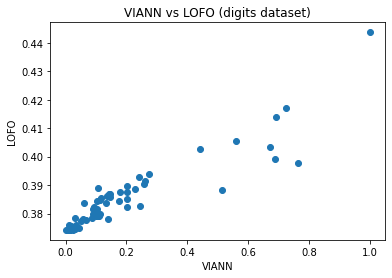

In [47]:
modelname = "NN1"
datname = VIANN_NN1[1][0]
xx = VIANN_NN1[1][1]
yy = LOFO_NN1[1][1][0]

f = plt.figure()
plt.scatter(xx, yy)
plt.xlabel('VIANN')
plt.ylabel('LOFO')
plt.title('VIANN vs LOFO' + " (" + datname + " dataset)")
plt.show()
f.savefig("VIANNvsLOFO_" + datname + "_" + modelname +".pdf")

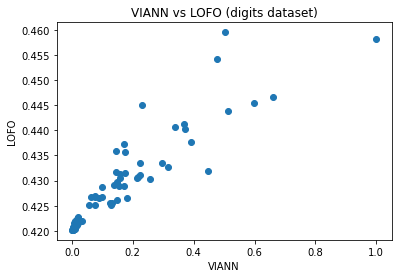

0.9025711055019542


In [48]:
modelname = "NN2"
datname = VIANN_NN2[1][0]
xx = VIANN_NN2[1][1]
yy = LOFO_NN2[1][1][0]

f = plt.figure()
plt.scatter(xx, yy)
plt.xlabel('VIANN')
plt.ylabel('LOFO')
plt.title('VIANN vs LOFO' + " (" + datname + " dataset)")
plt.show()
f.savefig("VIANNvsLOFO_" + datname + "_" + modelname +".pdf")

print(np.corrcoef([xx,yy])[0,1])

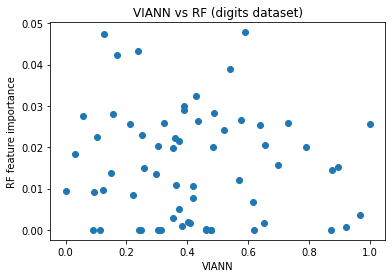

-0.0756082110650103


In [49]:
modelname = "NN3"
datname = VIANN_NN3[1][0]
xx = VIANN_NN3[1][1]
yy = RF[1][1]

f = plt.figure()
plt.scatter(xx, yy)
plt.xlabel('VIANN')
plt.ylabel('RF feature importance')
plt.title('VIANN vs RF' + " (" + datname + " dataset)")
plt.show()
f.savefig("VIANNvsRF_" + datname + "_" + modelname +".pdf")

print(np.corrcoef([xx,yy])[0,1])

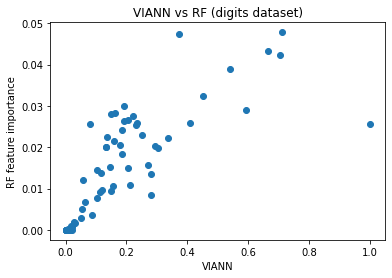

0.7770951404372035


In [50]:
modelname = "NN4"
datname = VIANN_NN4[1][0]
xx = VIANN_NN4[1][1]
yy = RF[1][1]

f = plt.figure()
plt.scatter(xx, yy)
plt.xlabel('VIANN')
plt.ylabel('RF feature importance')
plt.title('VIANN vs RF' + " (" + datname + " dataset)")
plt.show()
f.savefig("VIANNvsRF_" + datname + "_" + modelname +".pdf")

print(np.corrcoef([xx,yy])[0,1])

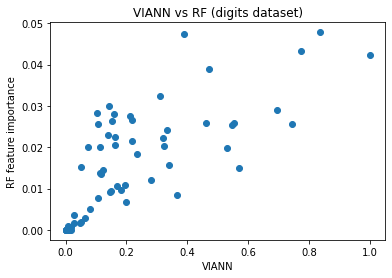

0.7486550281880388


In [52]:
modelname = "NN5"
datname = VIANN_NN5[1][0]
xx = VIANN_NN5[1][1]
yy = RF[1][1]

f = plt.figure()
plt.scatter(xx, yy)
plt.xlabel('VIANN')
plt.ylabel('RF feature importance')
plt.title('VIANN vs RF' + " (" + datname + " dataset)")
plt.show()
f.savefig("VIANNvsRF_" + datname + "_" + modelname +".pdf")

print(np.corrcoef([xx,yy])[0,1])